In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import re
import matplotlib.pyplot as plt 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufo-sightings/scrubbed.csv
/kaggle/input/ufo-sightings/complete.csv


In [23]:

# Path of the file to read
file_path = '../input/ufo-sightings/scrubbed.csv'

ufo_data = pd.read_csv(file_path)

# Remove spaces from column names
ufo_data.columns = ufo_data.columns.to_series().apply(lambda x: x.strip())

# features that we are going to consider
lat_long_features = ['latitude', 'longitude']

# Reducing the data set to 70000 rows and above mentioned columns
ufo_data = ufo_data.loc[1:70000, lat_long_features]

ufo_data.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(70000, 2)

In [24]:
X = []
data_lat_long = []

# Method to check if a number can be converted to Float
def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
for i, row in ufo_data.iterrows():
    lat = row['latitude']
    long = row['longitude']
#     Making sure lat and long do not contain any bad characters
    if is_float(lat) and is_float(long):
        data_lat_long.append([float(long), float(lat)])
X = np.array(data_lat_long)

In [25]:
from sklearn.cluster import DBSCAN 
epsilon = 10
minimumSamples = 30
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 0, 1])

In [26]:
# Create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# Making the core samples of high density true
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
# If there is -1 in labels, it means its noise
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

9

In [28]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [29]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

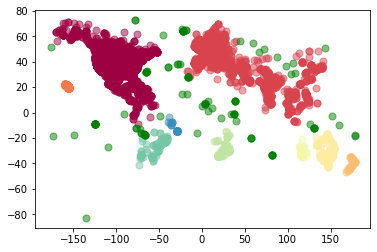

In [30]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)